In [4834]:
import pandas as pd
import sklearn.model_selection as model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_predict, cross_validate
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Data Cleaning

In [4835]:
data = pd.read_csv('/Users/dgrubis/Desktop/STATS 535/all_college_data.csv')
data.head()

,Player,Team_x,GP,MPG,FGM,FGA,FG%,3PM,3PA,3P%,...,Standing Vertical,Max Vertical Leap,Max Bench Press,Body Fat Percentage,Hand Length,Hand Width,Heightw/oshoesinches,Heightw/shoesinches,Standing_Reach_inches,Wingspan_inches
0,Andre Roberson,CU,36,30.2,4.1,8.1,0.510,0.5,1.4,0.380,...,30,36.5,10,0.0705,8.75,9.5,78.25,79.00,104.5,83.0
1,Lavoy Allen,TEM,33,33.9,4.7,9.7,0.480,0.2,0.5,0.294,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Vernon Macklin,UF,37,24.5,5.2,8.7,0.593,0.0,0.0,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Ryan Kelly,DUKE,31,25.9,3.5,7.8,0.444,1.3,3.2,0.408,...,-,-,-,0.1475,9,10,81.75,83.75,110.0,83.5
4,Michael Kidd-Gilchrist,UK,40,31.1,4.0,8.2,0.491,0.3,1.3,0.255,...,32,35.5,6,0.07,9,10.25,77.75,79.50,104.5,84.0


In [4836]:
#Drop any players who don't have advanced college stats
data = data.dropna(subset = ['PER'])

In [4837]:
#Next series of cells deal with the numerous nulls by filling them in with the averages of the feature
#Not ideal but allows us to still consider these features where this happens(in this case is alot)
data.Pick = data.Pick.fillna(61)
data.Pos = data.Pos.fillna('')
data.Weight = data.Weight.fillna(data.Weight.mean())
data.Age = data.Age.fillna(data.Age.mean())
data['Pre-Draft Team'] = data['Pre-Draft Team'].fillna('')

In [4838]:
data['Agility'] = pd.to_numeric(data['Agility'], errors='coerce')
data['Agility'] = data['Agility'].fillna(data['Agility'].mean())

In [4839]:
data['Shuttle Run'] = pd.to_numeric(data['Shuttle Run'], errors='coerce')
data['Shuttle Run'] = data['Shuttle Run'].fillna(data['Shuttle Run'].mean())

In [4840]:
data['Sprint'] = pd.to_numeric(data['Sprint'], errors='coerce')
data['Sprint'] = data['Sprint'].fillna(data['Sprint'].mean())

In [4841]:
data['Standing Vertical'] = pd.to_numeric(data['Standing Vertical'], errors='coerce')
data['Standing Vertical'] = data['Standing Vertical'].fillna(data['Standing Vertical'].mean())

In [4842]:
data['Max Vertical Leap'] = pd.to_numeric(data['Max Vertical Leap'], errors='coerce')
data['Max Vertical Leap'] = data['Max Vertical Leap'].fillna(data['Max Vertical Leap'].mean())

In [4843]:
data['Max Bench Press'] = pd.to_numeric(data['Max Bench Press'], errors='coerce')
data['Max Bench Press'] = data['Max Bench Press'].fillna(data['Max Bench Press'].mean())

In [4844]:
data['Body Fat Percentage'] = pd.to_numeric(data['Body Fat Percentage'], errors='coerce')
data['Body Fat Percentage'] = data['Body Fat Percentage'].fillna(data['Body Fat Percentage'].mean())

In [4845]:
data['Hand Length'] = pd.to_numeric(data['Hand Length'], errors='coerce')
data['Hand Length'] = data['Hand Length'].fillna(data['Hand Length'].mean())

In [4846]:
data['Hand Width'] = pd.to_numeric(data['Hand Width'], errors='coerce')
data['Hand Width'] = data['Hand Width'].fillna(data['Hand Width'].mean())

In [4847]:
data['Weight'] = data['Weight'].fillna(data['Weight'].mean())

In [4848]:
data['Heightw/oshoesinches'] = data['Heightw/oshoesinches'].fillna(data['Heightw/oshoesinches'].mean())

In [4849]:
data['Heightw/shoesinches'] = data['Heightw/shoesinches'].fillna(data['Heightw/shoesinches'].mean())

In [4850]:
data['Standing_Reach_inches'] = data['Standing_Reach_inches'].fillna(data['Standing_Reach_inches'].mean())

In [4851]:
data['Wingspan_inches'] = data['Wingspan_inches'].fillna(data['Wingspan_inches'].mean())

In [4852]:
#Lets check out the data to see how it looks with all the nulls filled in
data.head()

,Player,Team_x,GP,MPG,FGM,FGA,FG%,3PM,3PA,3P%,...,Standing Vertical,Max Vertical Leap,Max Bench Press,Body Fat Percentage,Hand Length,Hand Width,Heightw/oshoesinches,Heightw/shoesinches,Standing_Reach_inches,Wingspan_inches
0,Andre Roberson,CU,36,30.2,4.1,8.1,0.510,0.5,1.4,0.380,...,30.00000,36.500000,10.000000,0.070500,8.750000,9.500000,78.250000,79.000000,104.500000,83.000000
1,Lavoy Allen,TEM,33,33.9,4.7,9.7,0.480,0.2,0.5,0.294,...,29.65625,34.804075,11.380192,0.071527,8.795455,9.529221,77.673469,78.996875,103.656706,82.563517
2,Vernon Macklin,UF,37,24.5,5.2,8.7,0.593,0.0,0.0,0.000,...,29.65625,34.804075,11.380192,0.071527,8.795455,9.529221,77.673469,78.996875,103.656706,82.563517
3,Ryan Kelly,DUKE,31,25.9,3.5,7.8,0.444,1.3,3.2,0.408,...,29.65625,34.804075,11.380192,0.147500,9.000000,10.000000,81.750000,83.750000,110.000000,83.500000
4,Michael Kidd-Gilchrist,UK,40,31.1,4.0,8.2,0.491,0.3,1.3,0.255,...,32.00000,35.500000,6.000000,0.070000,9.000000,10.250000,77.750000,79.500000,104.500000,84.000000


# Data Exploration

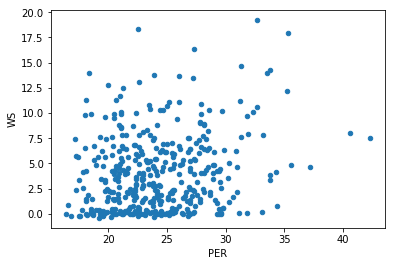

In [4853]:
#Intitial data exploring to see how some important features interact with WS
data.plot(x = 'PER', y = 'WS', kind = 'scatter')

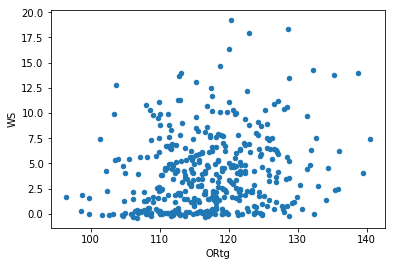

In [4854]:
data.plot(x = 'ORtg', y = 'WS', kind = 'scatter')
#Shows increasing trend and compared to DRtg below; offense more important to a high WS?

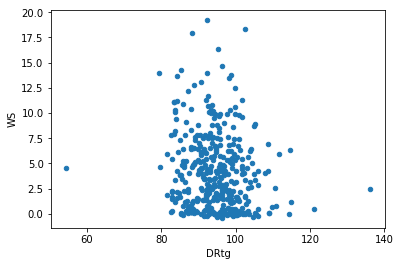

In [4855]:
data.plot(x = 'DRtg', y = 'WS', kind = 'scatter')
#Interesting plot on how defensive rating impacts WS
#No defensive studs sporting a high WS

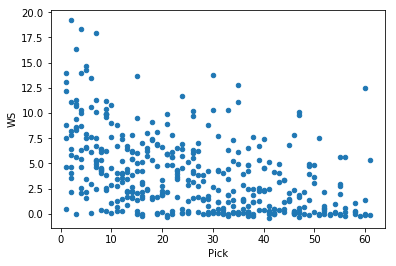

In [4856]:
#See how what draft pick a player was affects the peak WS they achieved in their career
#Pick 61 refers to undrafted players
data.plot(x = 'Pick', y = 'WS', kind = 'scatter')

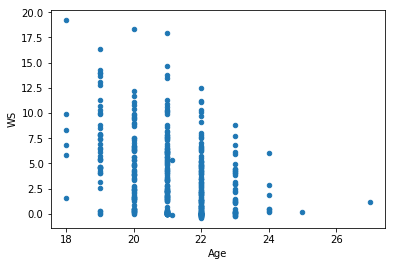

In [4857]:
data.plot(x = 'Age', y = 'WS', kind = 'scatter')

## Model Building

In [4858]:
#my_features = ['GP', 'MPG', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'TOV', 'PF', 'ORB', 'DRB', 'RPG', 'APG', 'SPG', 'BPG', 'PPG', 'TS%', 'eFG%', 'Total S %', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'TOV%', 'STL%', 'BLK%', 'USG%', 'PPR', 'PPS', 'ORtg', 'DRtg', 'eDiff', 'FIC', 'PER', 'Pick', 'Weight', 'Age', 'Agility', 'Shuttle Run', 'Sprint', 'Standing Vertical', 'Max Vertical', 'Max Bench Press', 'Body Fat Percentage', 'Hand Length', 'Hand Width', 'Heightw/shoesinches', 'Standing_Reach_inches', 'Wingspan_inches']

In [4859]:
#initialize the features and target
#38 features
features = data.drop(['Player', 'Team_x', 'WS', 'WS/48', 'Pos', 'Pre-Draft Team', 'TOV', 'PF', 'Total S %', 'eDiff', 'FIC', 'Agility', 'Shuttle Run', 'Sprint', 'Standing Vertical', 'Max Vertical Leap', 'Max Bench Press', 'Body Fat Percentage', 'Hand Length', 'Hand Width', 'Heightw/oshoesinches', 'Standing_Reach_inches'],1)
target = data['WS']

In [4860]:
#split the features and target into training and testing data
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size = 0.35)

In [4861]:
#standardize the features
scaler = preprocessing.StandardScaler().fit(features_train)
scaler.transform(features_train)
scaler.transform(features_test)

array([[ 0.01482797, -0.72606321, -0.28971606, ..., -2.34033553,
         0.30799602,  0.14232376],
       [-1.62242748, -2.02573514, -1.09872298, ...,  1.45055026,
         0.05442627,  0.02975059],
       [ 0.01482797,  0.62891391,  0.51929086, ..., -0.06580406,
         0.05442627,  0.02975059],
       ..., 
       [ 0.01482797,  0.40769315, -0.45151745, ..., -0.06580406,
         0.05442627,  0.02975059],
       [ 1.32463234, -1.22380991, -0.77512021, ...,  0.6923731 ,
        -0.11286663, -0.11558612],
       [ 0.66973016,  0.07586202,  0.0338867 , ...,  1.45055026,
         0.05442627,  0.02975059]])

In [4862]:
#Fit model by a multi-layer perceptron neural network using lbfgs optimization
model_MLP = MLPRegressor(hidden_layer_sizes = (38,), activation='identity', solver='lbfgs', alpha = 0.0001, max_iter = 1000, shuffle=True)
model_MLP.fit(features_train, target_train)

MLPRegressor(activation='identity', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(38,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [4863]:
#Fit a model by Ridge Regression
model_ridge = Ridge(alpha=1.0)
model_ridge.fit(features_train, target_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [4864]:
#Fit a model by a linear SVR
model_SVR = SVR(kernel = 'linear')
model_SVR.fit(features_train, target_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [4865]:
#Fit a model by Lasso Regression
model_lasso = linear_model.Lasso()
model_lasso.fit(features_train, target_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [4866]:
#Fit model by linear regression
model_LR = LinearRegression()
model_LR.fit(features_train, target_train)
print(model_LR.intercept_)
print(model_LR.coef_)

11.0749690212
[ -3.72554187e-02  -9.05755524e-02   1.56674695e+00   2.09789120e-01
  -9.58220730e+00   3.59495312e+00  -9.59224763e-01  -7.99242391e-01
   1.48468234e+00  -1.57210223e-02  -5.41425972e+00  -9.54981217e-01
  -1.72857086e-01   7.80483406e-01  -1.32468257e+00   1.98484687e+00
  -1.56060721e+00  -7.14684640e-01   1.09737093e+01  -7.50649419e+00
   9.82777148e-03  -4.46678324e-01   5.59966214e-01   6.08968538e-02
   4.04558066e-01  -5.37388916e-01   4.82346454e-01  -2.11080659e-02
   5.53083980e-01  -4.22124858e+00   1.86212373e-01  -2.83552885e-02
  -9.96990038e-02  -9.08193252e-02   1.03727293e-02  -7.48288572e-01
  -2.10435045e-02  -1.30919499e-02]


In [4867]:
#Predict target on testing data
target_pred_MLP = model_MLP.predict(features_test)
target_pred_LR = model_LR.predict(features_test)
target_pred_ridge = model_ridge.predict(features_test)
target_pred_SVR = model_SVR.predict(features_test)
target_pred_lasso = model_lasso.predict(features_test)

In [4868]:
#Evaluate model by mean square error and 10-fold cross validation

#print("MSE for MLP Regressor: ", np.sqrt(metrics.mean_squared_error(target_test, target_pred_MLP)))
#print("MSE for Linear Regression: ", np.sqrt(metrics.mean_squared_error(target_test, target_pred_LR)))
scores_MLP = cross_validate(model_MLP, features_test, target_test, cv=10, scoring='neg_mean_absolute_error', return_train_score=True)
print("Cross-Validation score for MLP Regressor: ", np.mean(-1*scores_MLP['test_score']))

scores_LR = cross_validate(model_LR, features_test, target_test, cv=10, scoring='neg_mean_absolute_error', return_train_score=True)
print("Cross-Validation score for Linear Regression: ", np.mean(-1*scores_LR['test_score']))

scores_ridge = cross_validate(model_ridge, features_test, target_test, cv=10, scoring='neg_mean_absolute_error', return_train_score=True)
print("Cross-Validation score for Ridge Regression: ", np.mean(-1*scores_ridge['test_score']))

scores_SVR = cross_validate(model_SVR, features_test, target_test, cv=10, scoring='neg_mean_absolute_error', return_train_score=True)
print("Cross-Validation score for linear SVR: ", np.mean(-1*scores_SVR['test_score']))

scores_lasso = cross_validate(model_lasso, features_test, target_test, cv=10, scoring='neg_mean_absolute_error', return_train_score=True)
print("Cross-Validation score for Lasso Regression: ", np.mean(-1*scores_lasso['test_score']))

Cross-Validation score for MLP Regressor:  3.12749169082
Cross-Validation score for Linear Regression:  3.59041197959
Cross-Validation score for Ridge Regression:  3.11592602342
Cross-Validation score for linear SVR:  2.96303695075
Cross-Validation score for Lasso Regression:  2.90778178115


## Applying Model to 2018 Prospects

In [4869]:
prospects_df = pd.read_csv('/Users/dgrubis/Desktop/STATS 535/2018_prospects_predictions.csv')
prospects_df.head()

,Player,Pos,Pre-Draft Team,GP,MPG,FGM,FGA,FG%,3PM,3PA,...,PPR,PPS,ORtg,DRtg,PER,Pick,Weight,Age,Heightw/shoesinches,Wingspan_inches
0,Deandre Ayton,C,Arizona,35,33.5,7.9,12.9,0.612,0.3,1.0,...,-2.7,1.6,130.3,97.5,30.6,1,250,19.6,85,89.0
1,Marvin Bagley III,PF/C,Duke,33,33.9,8.2,13.3,0.614,0.7,1.8,...,-3.7,1.6,128.1,97.5,28.3,2,225,18.9,83,84.5
2,Luka Doncic,PG,Real Madrid,49,24.7,4.7,10.4,0.456,1.5,4.9,...,4.2,1.5,124.2,106.2,25.4,3,220,19.0,80,NaN
3,Jaren Jackson Jr.,PF/C,Michigan State,35,21.8,3.4,6.6,0.513,1.1,2.7,...,-4.8,1.6,120.7,85.8,25.1,4,225,18.4,83,88.0
4,Mohamed Bamba,C,Texas,30,30.2,4.9,9.0,0.541,0.5,1.7,...,-4.2,1.4,118.4,88.4,26.4,5,216,19.8,85,93.0


In [4870]:
prospects_df['Wingspan_inches'] = prospects_df['Wingspan_inches'].fillna(prospects_df['Wingspan_inches'].mean())
prospects_df['PER'] = prospects_df['PER'].fillna(prospects_df['PER'].mean())

In [4871]:
prospects_df.head()

,Player,Pos,Pre-Draft Team,GP,MPG,FGM,FGA,FG%,3PM,3PA,...,PPR,PPS,ORtg,DRtg,PER,Pick,Weight,Age,Heightw/shoesinches,Wingspan_inches
0,Deandre Ayton,C,Arizona,35,33.5,7.9,12.9,0.612,0.3,1.0,...,-2.7,1.6,130.3,97.5,30.6,1,250,19.6,85,89.000000
1,Marvin Bagley III,PF/C,Duke,33,33.9,8.2,13.3,0.614,0.7,1.8,...,-3.7,1.6,128.1,97.5,28.3,2,225,18.9,83,84.500000
2,Luka Doncic,PG,Real Madrid,49,24.7,4.7,10.4,0.456,1.5,4.9,...,4.2,1.5,124.2,106.2,25.4,3,220,19.0,80,82.171687
3,Jaren Jackson Jr.,PF/C,Michigan State,35,21.8,3.4,6.6,0.513,1.1,2.7,...,-4.8,1.6,120.7,85.8,25.1,4,225,18.4,83,88.000000
4,Mohamed Bamba,C,Texas,30,30.2,4.9,9.0,0.541,0.5,1.7,...,-4.2,1.4,118.4,88.4,26.4,5,216,19.8,85,93.000000


In [4872]:
pro_features = prospects_df.drop(['Player', 'Pre-Draft Team', 'Pos'], 1)
scaler.transform(pro_features)

array([[ 0.34227907,  0.46299834,  1.73280124, ..., -1.12725208,
         2.0756191 ,  1.68978301],
       [-0.31262312,  0.57360872,  1.97550331, ..., -1.65797609,
         1.40223888,  0.52918857],
       [ 4.92659435, -1.97042995, -0.85602091, ..., -1.58215837,
         0.39216854, -0.07130641],
       ..., 
       [ 0.66973016, -1.16850472, -0.53241814, ..., -0.06580406,
         1.06554877,  1.43187313],
       [ 1.32463234,  0.35238796, -0.77512021, ..., -0.06580406,
        -0.61790179,  0.01336882],
       [-0.9675253 , -1.83216698, -1.98863059, ..., -1.58215837,
        -1.29128202, -2.69468487]])

In [4873]:
#Using the multi-layer perceptron neural network model to predict current prospects
results = model_MLP.predict(pro_features)

In [4874]:
results

array([ 8.61326547,  9.47098788,  8.02854182,  8.96236168,  5.5211178 ,
        1.97186021,  6.81855986,  8.76131627,  5.90350352,  6.38909849,
        6.31061538,  4.84367193,  6.67659388,  4.82530504,  3.0197443 ,
        4.14612233,  5.02212985,  6.84696635,  3.59550282,  3.34026233,
        2.27294468,  5.17312982,  1.81311233,  3.76587826,  3.99155676,
        3.05225671,  2.0398165 ,  2.56763901,  4.31563398,  5.18809154,
        3.9114272 ,  3.87996626,  3.03942684,  0.97742034,  1.83064772,
        1.63125455,  4.41935377,  2.77474394,  2.36293408, -0.04826553,
        3.13788929,  2.64924557, -1.13836253,  1.98057267,  1.15603976,
        1.55805869,  0.55895637,  0.72672949,  1.67431447,  2.9333349 ,
       -0.89939061,  1.73232919,  1.36275301,  3.38551051,  2.10245961,
       -2.14809767,  0.63694547,  0.9173577 ,  3.02287804,  1.44941957,
       -3.14739196,  1.00412855,  0.53681329,  0.49091908,  0.50776757,
       -1.28120229, -0.58169435,  3.93301877,  0.40421017, -0.54

In [4875]:
prospects_df['WS'] = results

In [4876]:
final_results = prospects_df[['Player', 'WS']]

In [4877]:
final_results

,Player,WS
0,Deandre Ayton,8.613265
1,Marvin Bagley III,9.470988
2,Luka Doncic,8.028542
3,Jaren Jackson Jr.,8.962362
4,Mohamed Bamba,5.521118
5,Michael Porter Jr.,1.971860
6,Mikal Bridges,6.818560
7,Wendell Carter Jr.,8.761316
8,Collin Sexton,5.903504
9,Miles Bridges,6.389098


In [4879]:
#final_results.to_csv('/Users/dgrubis/Desktop/STATS 535/2018_WS.csv')